# Set Parameter
- Attention = [None, Luong]
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 100
- N = 100
- Data Length = 100K
- Deduplication

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
character_accuracy = []
sentance_accuracy = []

In [4]:
train_path = "data/palindrome_dedup/K100/data_train.txt"
dev_path = "data/palindrome_dedup/K100/data_test.txt"

src = fields.SourceField()
tgt = fields.TargetField()
max_len = 104
def len_filter(example):
    return len(example.src) <= max_len and len(example.tgt) <= max_len
train = torchtext.data.TabularDataset(
    path=train_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
dev = torchtext.data.TabularDataset(
    path=dev_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
src.build_vocab(train)
tgt.build_vocab(train)
input_vocab = src.vocab
output_vocab = tgt.vocab

weight = torch.ones(len(tgt.vocab))
pad = tgt.vocab.stoi[tgt.pad_token]
loss = Perplexity(weight, pad)
if torch.cuda.is_available():
    loss.cuda()
    
optimizer = "Adam"
hidden_size = 50
bidirectional = True

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


# Prepare dataset

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-03-15 15:05:28,154 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


None Att


2019-03-15 15:08:00,976 INFO   Finished epoch 1: Train loss: 17.3056, Dev loss: 28.1747, Accuracy(Character): 0.2401, Accuracy(Word): 0.0000
2019-03-15 15:10:35,084 INFO   Finished epoch 2: Train loss: 13.4023, Dev loss: 17.9332, Accuracy(Character): 0.2720, Accuracy(Word): 0.0000
2019-03-15 15:13:07,817 INFO   Finished epoch 3: Train loss: 12.6272, Dev loss: 14.7522, Accuracy(Character): 0.2800, Accuracy(Word): 0.0010
2019-03-15 15:15:41,415 INFO   Finished epoch 4: Train loss: 9.4797, Dev loss: 22.3047, Accuracy(Character): 0.2968, Accuracy(Word): 0.0005
2019-03-15 15:18:13,826 INFO   Finished epoch 5: Train loss: 10.8746, Dev loss: 18.4838, Accuracy(Character): 0.3200, Accuracy(Word): 0.0054
2019-03-15 15:20:47,997 INFO   Finished epoch 6: Train loss: 9.6138, Dev loss: 11.4588, Accuracy(Character): 0.3567, Accuracy(Word): 0.0043
2019-03-15 15:23:23,245 INFO   Finished epoch 7: Train loss: 8.3264, Dev loss: 25.7025, Accuracy(Character): 0.3436, Accuracy(Word): 0.0068
2019-03-15 15:25

2019-03-15 17:39:45,758 INFO   Finished epoch 60: Train loss: 4.7657, Dev loss: 17.3201, Accuracy(Character): 0.3614, Accuracy(Word): 0.0367
2019-03-15 17:42:19,696 INFO   Finished epoch 61: Train loss: 4.6818, Dev loss: 10.5406, Accuracy(Character): 0.3827, Accuracy(Word): 0.0368
2019-03-15 17:44:55,092 INFO   Finished epoch 62: Train loss: 4.8824, Dev loss: 10.3665, Accuracy(Character): 0.3854, Accuracy(Word): 0.0396
2019-03-15 17:47:29,730 INFO   Finished epoch 63: Train loss: 4.7574, Dev loss: 10.7273, Accuracy(Character): 0.3834, Accuracy(Word): 0.0415
2019-03-15 17:50:04,368 INFO   Finished epoch 64: Train loss: 4.7428, Dev loss: 9.6914, Accuracy(Character): 0.3993, Accuracy(Word): 0.0492
2019-03-15 17:52:38,486 INFO   Finished epoch 65: Train loss: 4.9094, Dev loss: 9.3036, Accuracy(Character): 0.3945, Accuracy(Word): 0.0526
2019-03-15 17:55:14,121 INFO   Finished epoch 66: Train loss: 5.0586, Dev loss: 9.4372, Accuracy(Character): 0.3939, Accuracy(Word): 0.0502
2019-03-15 17:57

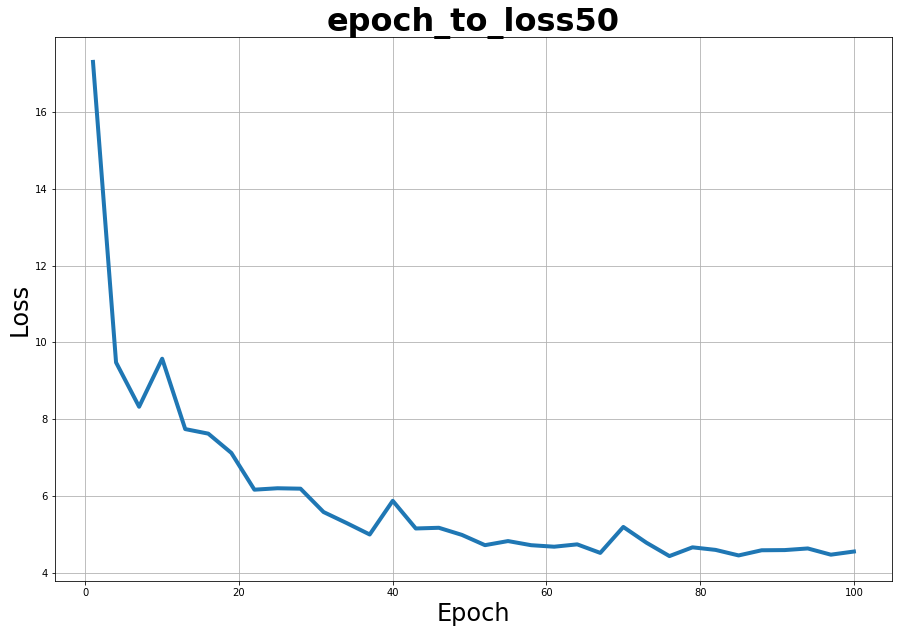

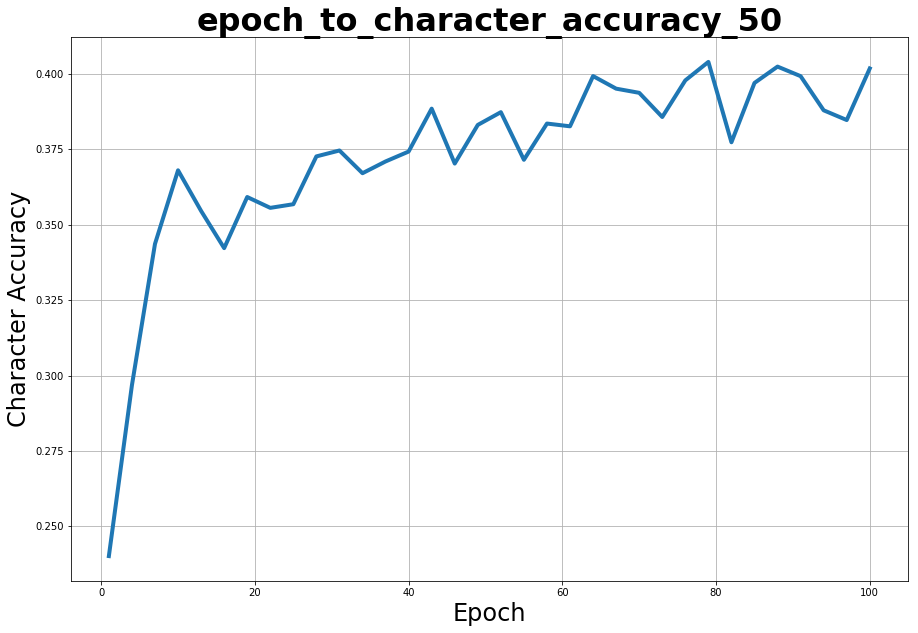

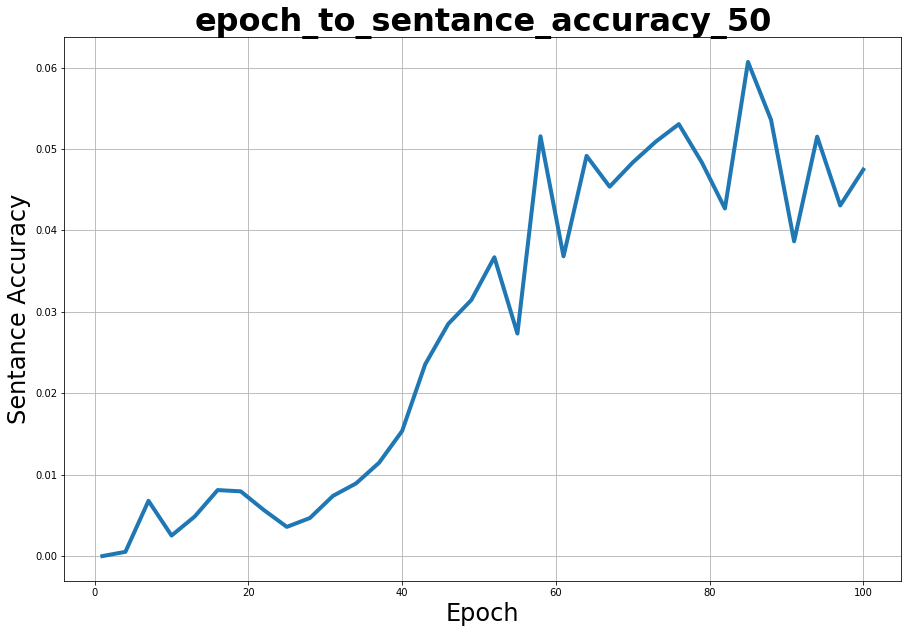

In [5]:
print("None Att")

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                    bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                     dropout_p=0.2, use_attention=None, bidirectional=bidirectional,
                     eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer(loss=loss, batch_size=32,
                      checkpoint_every=50,
                      print_every=100,
                      hidden_size=hidden_size,
                      path="palindrome_dedup_K100_parameter/None_att")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)

torch.save(seq2seq.state_dict(), 'log/pth/palindrome_dedup_K100_parameter_no_att_model_save.pth')

2019-03-15 19:22:39,359 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


Luong Att


/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-03-15 19:25:53,552 INFO   Finished epoch 1: Train loss: 18.6402, Dev loss: 22.2589, Accuracy(Character): 0.2390, Accuracy(Word): 0.0000
2019-03-15 19:29:07,046 INFO   Finished epoch 2: Train loss: 12.9746, Dev loss: 14.2381, Accuracy(Character): 0.2830, Accuracy(Word): 0.0083
2019-03-15 19:32:21,418 INFO   Finished epoch 3: Train loss: 12.5506, Dev loss: 17.5076, Accuracy(Character): 0.3326, Accuracy(Word): 0.0128
2019-03-15 19:35:33,595 INFO   Finished epoch 4: Train loss: 10.4004, Dev loss: 18.6787, Accuracy(Character): 0.3357, Accuracy(Word): 0.0140
2019-03-15 19:38:46,278 INFO   Finished epoch 5: Train loss: 10.9261, Dev loss: 20.6252, Accuracy(Character): 0.3295, Accuracy(Word): 0.0041
2019-03-15 19:42:01,137 INFO   Finished epoch 6: Train loss:

2019-03-15 22:30:28,161 INFO   Finished epoch 58: Train loss: 5.2481, Dev loss: 11.8819, Accuracy(Character): 0.3965, Accuracy(Word): 0.0634
2019-03-15 22:33:45,196 INFO   Finished epoch 59: Train loss: 4.9931, Dev loss: 8.7721, Accuracy(Character): 0.4122, Accuracy(Word): 0.0639
2019-03-15 22:37:00,390 INFO   Finished epoch 60: Train loss: 4.7570, Dev loss: 14.0712, Accuracy(Character): 0.3902, Accuracy(Word): 0.0633
2019-03-15 22:40:13,118 INFO   Finished epoch 61: Train loss: 5.0931, Dev loss: 8.9111, Accuracy(Character): 0.4082, Accuracy(Word): 0.0618
2019-03-15 22:43:28,860 INFO   Finished epoch 62: Train loss: 4.7899, Dev loss: 17.8567, Accuracy(Character): 0.3954, Accuracy(Word): 0.0706
2019-03-15 22:46:41,897 INFO   Finished epoch 63: Train loss: 5.2390, Dev loss: 8.5539, Accuracy(Character): 0.4172, Accuracy(Word): 0.0608
2019-03-15 22:49:56,044 INFO   Finished epoch 64: Train loss: 4.9093, Dev loss: 11.2436, Accuracy(Character): 0.3992, Accuracy(Word): 0.0581
2019-03-15 22:53

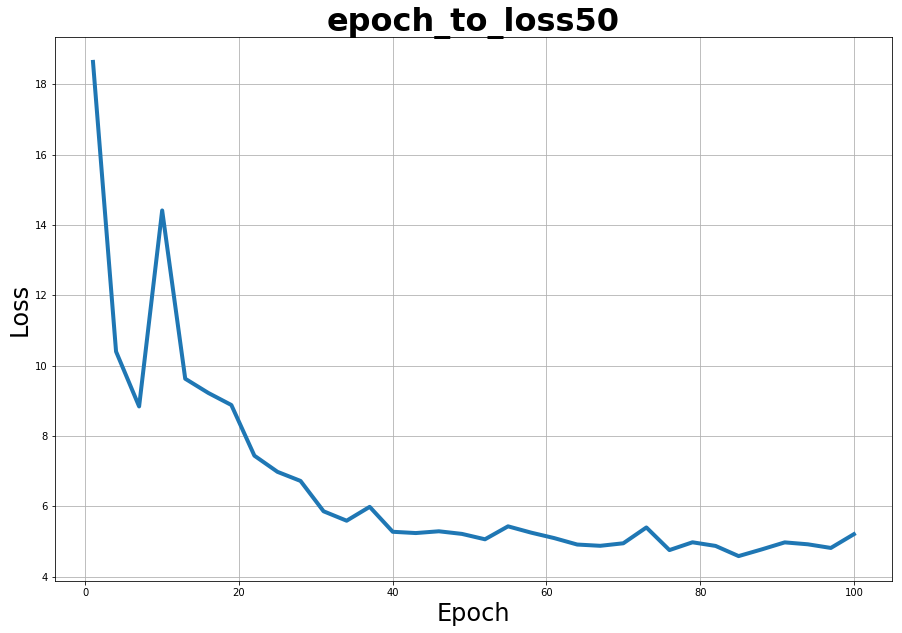

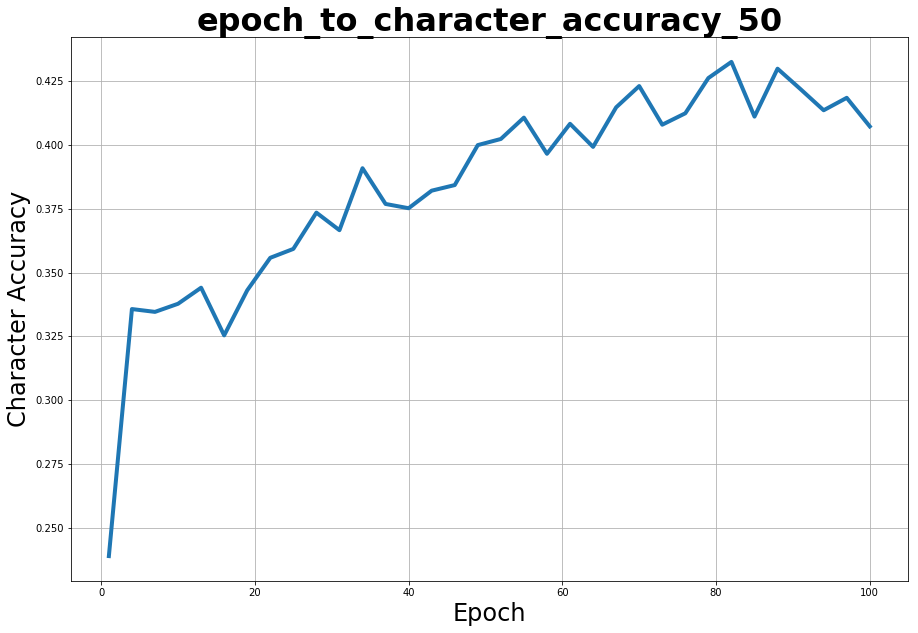

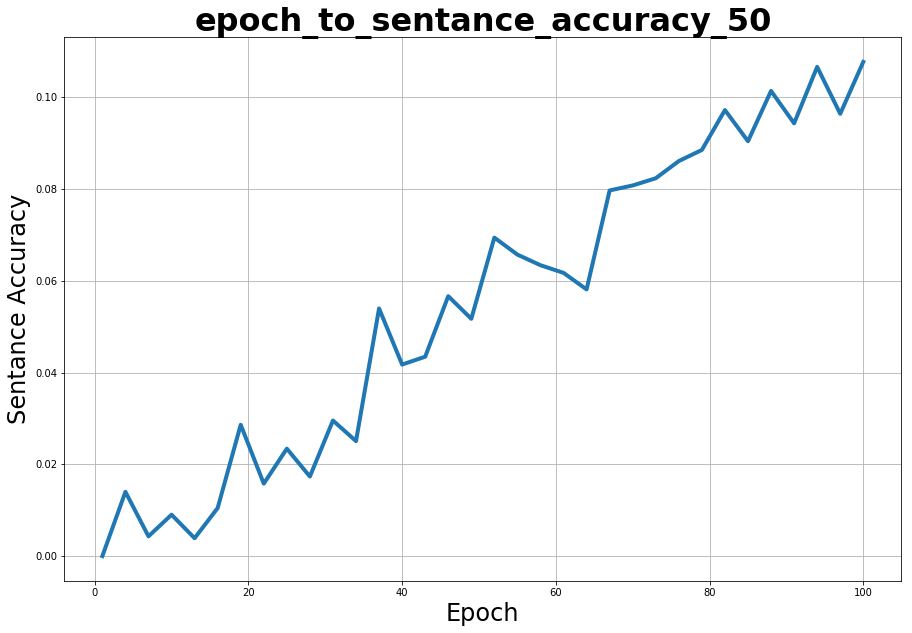

In [6]:
print("Luong Att")

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                    bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                     dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                     eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer(loss=loss, batch_size=32,
                      checkpoint_every=50,
                      print_every=100,
                      hidden_size=hidden_size,
                      path="palindrome_dedup_K100_parameter/Luong_att")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)

torch.save(seq2seq.state_dict(), 'log/pth/palindrome_dedup_K100_parameter_Luong_att_model_save.pth')

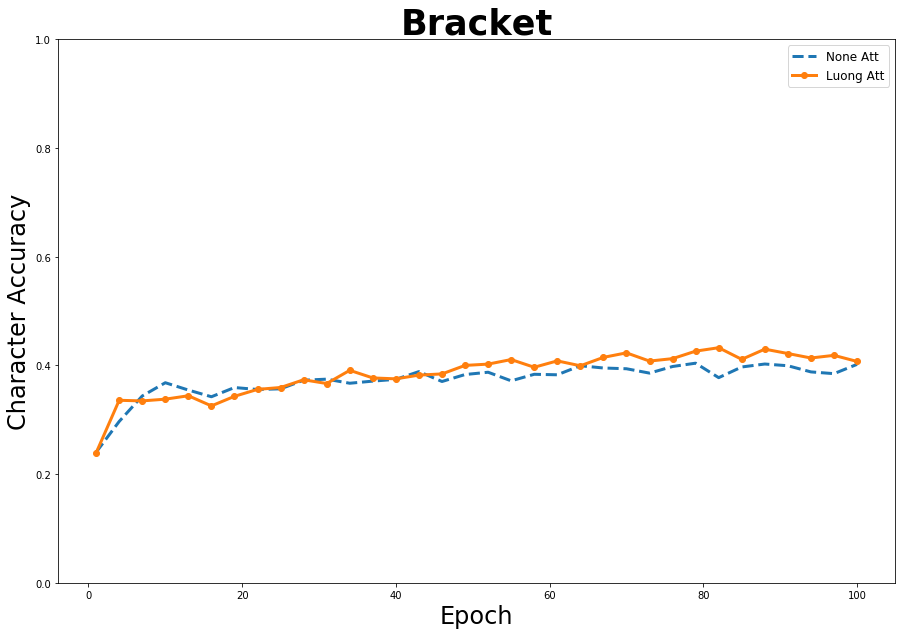

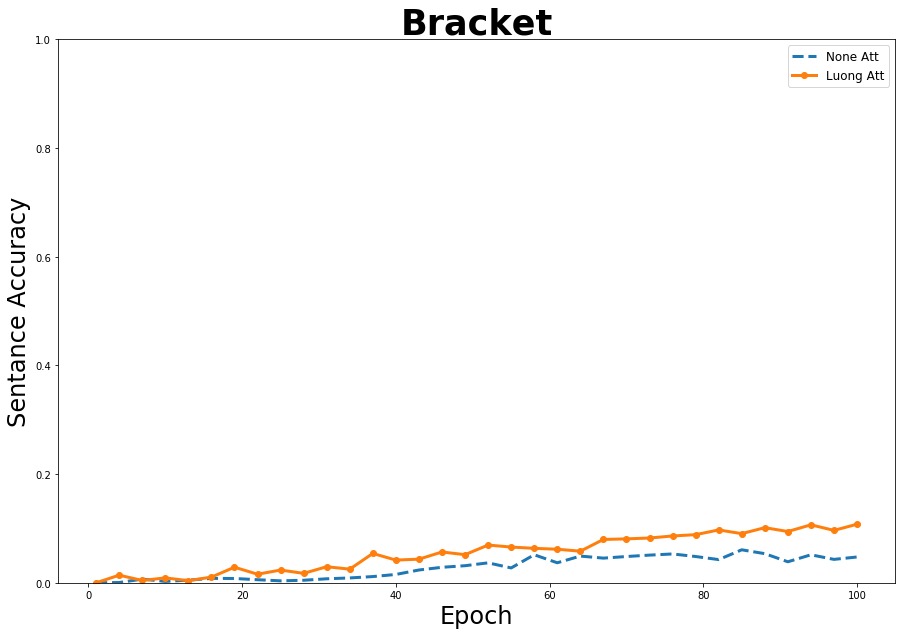

In [7]:
epochs = list(range(1, 101, 1))
plt.figure(figsize=(15,10))
plt.plot(epochs[::3], character_accuracy[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], character_accuracy[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Character Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('Palindrome', fontsize=35, fontweight=560)
plt.savefig('log/plot/palindrome_dedup_K100_parameter/epoch_to_character_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], sentance_accuracy[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], sentance_accuracy[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentance Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('Palindrome', fontsize=35, fontweight=560)
plt.savefig('log/plot/palindrome_dedup_K100_parameter/epoch_to_sentance_accuracy.png')

In [8]:
print(character_accuracy[0])
print(character_accuracy[1])

[0.2401075616401374, 0.27197429603606227, 0.27995261320081133, 0.2967784791466114, 0.31999055105803287, 0.35672029355660306, 0.3436498492076742, 0.3286001001729938, 0.3627558940439696, 0.3680629313743948, 0.3437596132327814, 0.36327167839495866, 0.35459108460355293, 0.35418968218163993, 0.3549299677101946, 0.3422531108687698, 0.3572808360537524, 0.34938350982015043, 0.35920259455158376, 0.3232625136316973, 0.34393971148756897, 0.35560915481700667, 0.36313420694603804, 0.35898271127798714, 0.35681655909318577, 0.34033419415799626, 0.3492662861040165, 0.3726776383328656, 0.37632791380859854, 0.37642631068547455, 0.37463598483906607, 0.3780628248073801, 0.37675311619712054, 0.367100276008568, 0.35363908593919285, 0.3851807909403829, 0.37099956307523985, 0.37330815983631305, 0.36770735276878863, 0.3742818271269888, 0.3855644321931847, 0.35150739042246715, 0.3885149176059365, 0.3652243413270435, 0.373649174283248, 0.3703029700226988, 0.3938866055919265, 0.384647955867047, 0.3831183639831908

In [9]:
print(sentance_accuracy[0])
print(sentance_accuracy[1])

[0.0, 0.0, 0.0009507178890182383, 0.0005238649592549476, 0.005413271245634459, 0.004268529297632906, 0.006790842064415987, 0.004559565386107877, 0.000989522700814901, 0.002522312766783081, 0.006169965075669383, 0.004656577415599534, 0.004850601474582848, 0.005665502522312767, 0.006228172293364377, 0.008110205665502522, 0.0046177726038028714, 0.008401241753977494, 0.00795498641831587, 0.011253395421032208, 0.007353511835467598, 0.005665502522312767, 0.005316259216142802, 0.013271245634458672, 0.0035894450911913077, 0.004986418315871168, 0.010923554520760574, 0.004675979821497866, 0.0041327124563445864, 0.0032984090027163367, 0.007392316647264261, 0.007974388824214203, 0.014144353899883586, 0.00892510671323244, 0.01086534730306558, 0.014377182770663563, 0.011466821885913853, 0.022060535506402794, 0.01963523476911137, 0.015366705471478464, 0.023282887077997673, 0.03149010477299185, 0.02355452076057431, 0.028812572759022118, 0.029181218471090415, 0.02852153667054715, 0.030811020566550253, 